In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("data/wb_unido_who_dataset.csv", index_col=0)
df.head()

,gdp_current_usd,gdp_per_capita,inflation_rate,unemployment_rate,trade_percent_gdp,exports_percent_gdp,imports_percent_gdp,gross_savings_percent_gdp,education_expenditure_percent_gdp,health_expenditure_percent_gdp,population,urban_population_percent,manufacturing_value_added_per_capita,manufacturing_percent_gdp,industry_value_added_percent_gdp,medical_doctors,life_expectancy,infant_mortality_rate,probability_of_dying,air_pollution
economy,,,,,,,,,,,,,,,,,,,,
ABW,3.084805e+09,28650.079388,NaN,NaN,153.458825,74.911679,78.547146,11.515790,3.618558,NaN,107716.0,44.068600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,1.110089e+12,1514.638858,6.994467,8.066600,55.157285,25.533585,28.029980,19.890167,4.029726,5.905218,731831360.6,37.912138,1.176927e+11,10.593986,26.387866,NaN,NaN,NaN,NaN,NaN
AFG,1.646635e+10,409.575581,2.640260,13.018000,59.647936,14.998950,44.648986,-2.737769,NaN,18.740391,40750097.2,26.630800,1.371043e+09,8.438113,14.181612,3.17,60.986038,53.768425,32.7,5236.072
AFW,8.067608e+11,1625.242035,4.654425,3.948651,NaN,NaN,NaN,NaN,3.150744,3.896020,497808038.6,49.116984,1.017318e+11,12.557476,28.808897,NaN,NaN,NaN,NaN,NaN
AGO,7.693571e+10,2147.421961,22.253144,15.218400,67.879062,41.833334,26.045728,32.254223,2.465685,2.942555,35650869.0,68.067000,5.794779e+09,7.460300,45.553859,2.44,64.255839,38.271402,24.7,3998.196


In [48]:
from sklearn.impute import KNNImputer

# Удаляем страны, где совсем нет данных (например, если пропущено более 50% колонок)
threshold = 0.5 * len(df.columns)
final_df_clean = df.dropna(thresh=threshold)

# Заполняем оставшиеся пропуски методом k-ближайших соседей
imputer = KNNImputer(n_neighbors=10)
df_imputed = pd.DataFrame(imputer.fit_transform(df), 
                          columns=df.columns, 
                          index=df.index)

In [49]:
df_imputed.head()

,gdp_current_usd,gdp_per_capita,inflation_rate,unemployment_rate,trade_percent_gdp,exports_percent_gdp,imports_percent_gdp,gross_savings_percent_gdp,education_expenditure_percent_gdp,health_expenditure_percent_gdp,population,urban_population_percent,manufacturing_value_added_per_capita,manufacturing_percent_gdp,industry_value_added_percent_gdp,medical_doctors,life_expectancy,infant_mortality_rate,probability_of_dying,air_pollution
economy,,,,,,,,,,,,,,,,,,,,
ABW,3.084805e+09,28650.079388,11.250394,8.891130,153.458825,74.911679,78.547146,11.515790,3.618558,6.065941,107716.0,44.068600,2.391581e+08,7.896325,19.976804,13.056,67.093129,27.003169,21.32,1726.8704
AFE,1.110089e+12,1514.638858,6.994467,8.066600,55.157285,25.533585,28.029980,19.890167,4.029726,5.905218,731831360.6,37.912138,1.176927e+11,10.593986,26.387866,20.038,71.113027,20.804694,19.09,5612.5481
AFG,1.646635e+10,409.575581,2.640260,13.018000,59.647936,14.998950,44.648986,-2.737769,3.275618,18.740391,40750097.2,26.630800,1.371043e+09,8.438113,14.181612,3.170,60.986038,53.768425,32.70,5236.0720
AFW,8.067608e+11,1625.242035,4.654425,3.948651,111.565507,59.056089,52.681848,26.685960,3.150744,3.896020,497808038.6,49.116984,1.017318e+11,12.557476,28.808897,27.196,72.441723,19.525343,18.78,3958.1770
AGO,7.693571e+10,2147.421961,22.253144,15.218400,67.879062,41.833334,26.045728,32.254223,2.465685,2.942555,35650869.0,68.067000,5.794779e+09,7.460300,45.553859,2.440,64.255839,38.271402,24.70,3998.1960


In [50]:
desc_stats = df_imputed.describe().T
desc_stats[['mean', '50%', 'std', 'min', 'max']]

,mean,50%,std,min,max
gdp_current_usd,3.147974e+12,7.125189e+10,1.084640e+13,5.832232e+07,1.010219e+14
gdp_per_capita,1.934368e+04,7.684504e+03,2.822518e+04,2.041477e+02,2.208369e+05
inflation_rate,9.086090e+00,5.087255e+00,2.297435e+01,3.391943e-01,2.534844e+02
unemployment_rate,7.422653e+00,6.083006e+00,4.973801e+00,1.332000e-01,3.438840e+01
trade_percent_gdp,8.775641e+01,8.007713e+01,5.155786e+01,4.343356e+00,3.975902e+02
exports_percent_gdp,4.043151e+01,3.340780e+01,2.875204e+01,2.249511e+00,2.151265e+02
imports_percent_gdp,4.728949e+01,4.313919e+01,2.555395e+01,2.093845e+00,1.834176e+02
gross_savings_percent_gdp,2.264069e+01,2.175018e+01,8.638831e+00,-9.300872e+00,5.609132e+01
education_expenditure_percent_gdp,4.247066e+00,3.952474e+00,1.861391e+00,7.058250e-06,1.534852e+01
health_expenditure_percent_gdp,6.811650e+00,6.229821e+00,2.935220e+00,2.160908e+00,1.963916e+01


In [51]:
skewness = df_imputed.skew().sort_values(ascending=False)
print("Ассиметрия в данных")
skewness

Ассиметрия в данных


air_pollution                           11.045135
inflation_rate                           8.463275
gdp_current_usd                          5.320019
population                               5.000841
manufacturing_value_added_per_capita     4.755590
gdp_per_capita                           3.241054
exports_percent_gdp                      2.813356
trade_percent_gdp                        2.731186
unemployment_rate                        2.051810
education_expenditure_percent_gdp        2.026888
imports_percent_gdp                      1.953283
health_expenditure_percent_gdp           1.224553
medical_doctors                          1.185062
infant_mortality_rate                    1.149187
manufacturing_percent_gdp                0.919507
industry_value_added_percent_gdp         0.728736
probability_of_dying                     0.562180
gross_savings_percent_gdp                0.341591
urban_population_percent                -0.100940
life_expectancy                         -0.177401


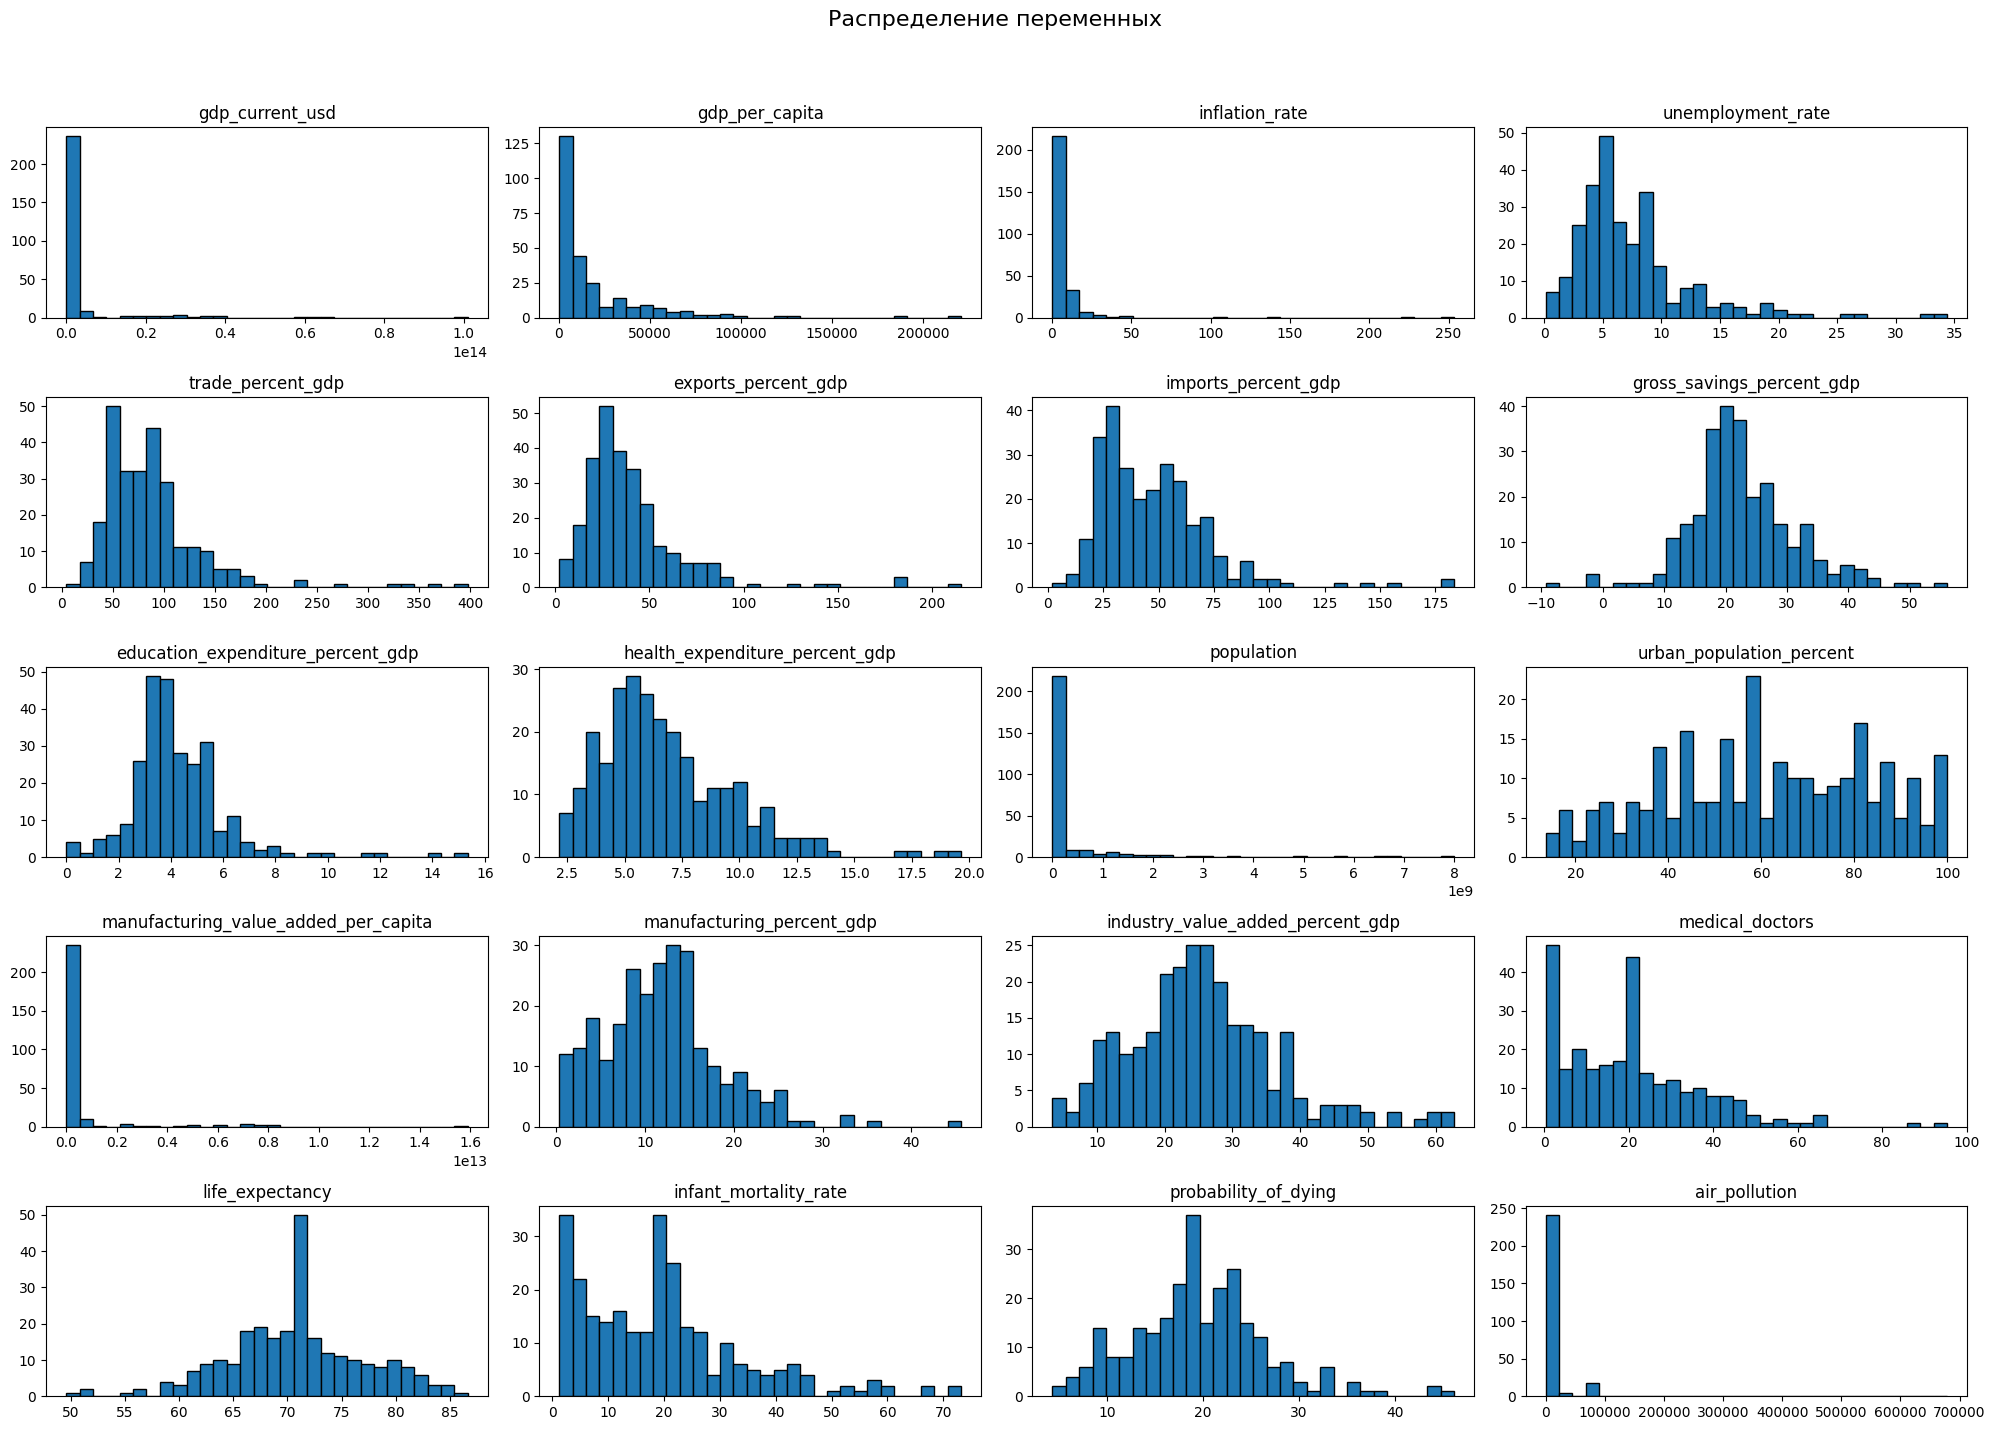

In [52]:
df_imputed.hist(bins=30, figsize=(20, 15), edgecolor='black', grid=False)
plt.suptitle('Распределение переменных', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

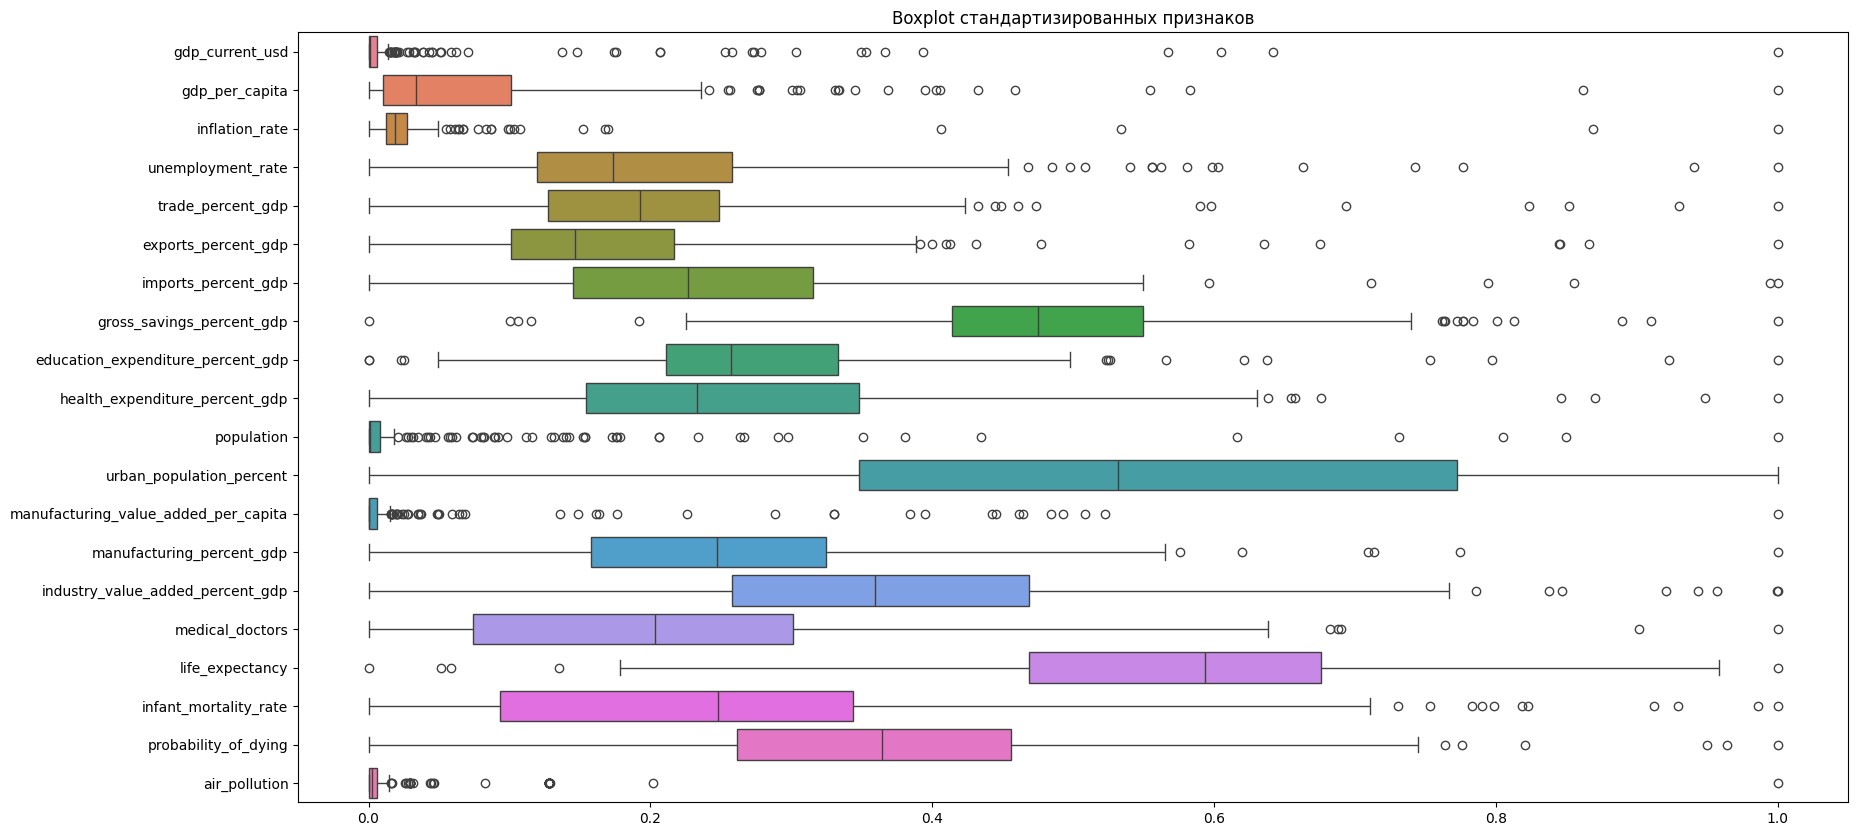

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler_viz = MinMaxScaler()
df_viz = pd.DataFrame(scaler_viz.fit_transform(df_imputed), columns=df_imputed.columns)

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_viz, orient='h')
plt.title('Boxplot стандартизированных признаков')
plt.show()

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Удаляем абсолютные величины 
# Вместо  gdp_current_usd  у нас есть  gdp_per_capita. Это лучший индикатор богатства нации (лучший из доступных конечно же, откапывать и закапывать яму он не запрещает)).
# Вместо  population  у нас есть косвенные показатели плотности и урбанизации ( urban_population_percent ), которые лучше описывают социальную структуру.
cols_to_drop = ['gdp_current_usd', 'population']
# Проверяем наличие перед удалением, чтобы код можно было перезапускать
df_eda = df_imputed.drop(columns=[c for c in cols_to_drop if c in df_imputed.columns])

In [55]:
# Логарифмирование сильно скошенных показателей
# Берем те, где skew > 3 и значения строго положительные
cols_to_log = [
    'gdp_per_capita', 
    'manufacturing_value_added_per_capita', 
    'air_pollution' 
]

for col in cols_to_log:
    if col in df_eda.columns:
        # log1p используется для избежания log(0)
        df_eda[f'log_{col}'] = np.log1p(df_eda[col])
        df_eda = df_eda.drop(columns=[col])

print(f"Размерность после трансформации: {df_eda.shape}")

Размерность после трансформации: (266, 18)


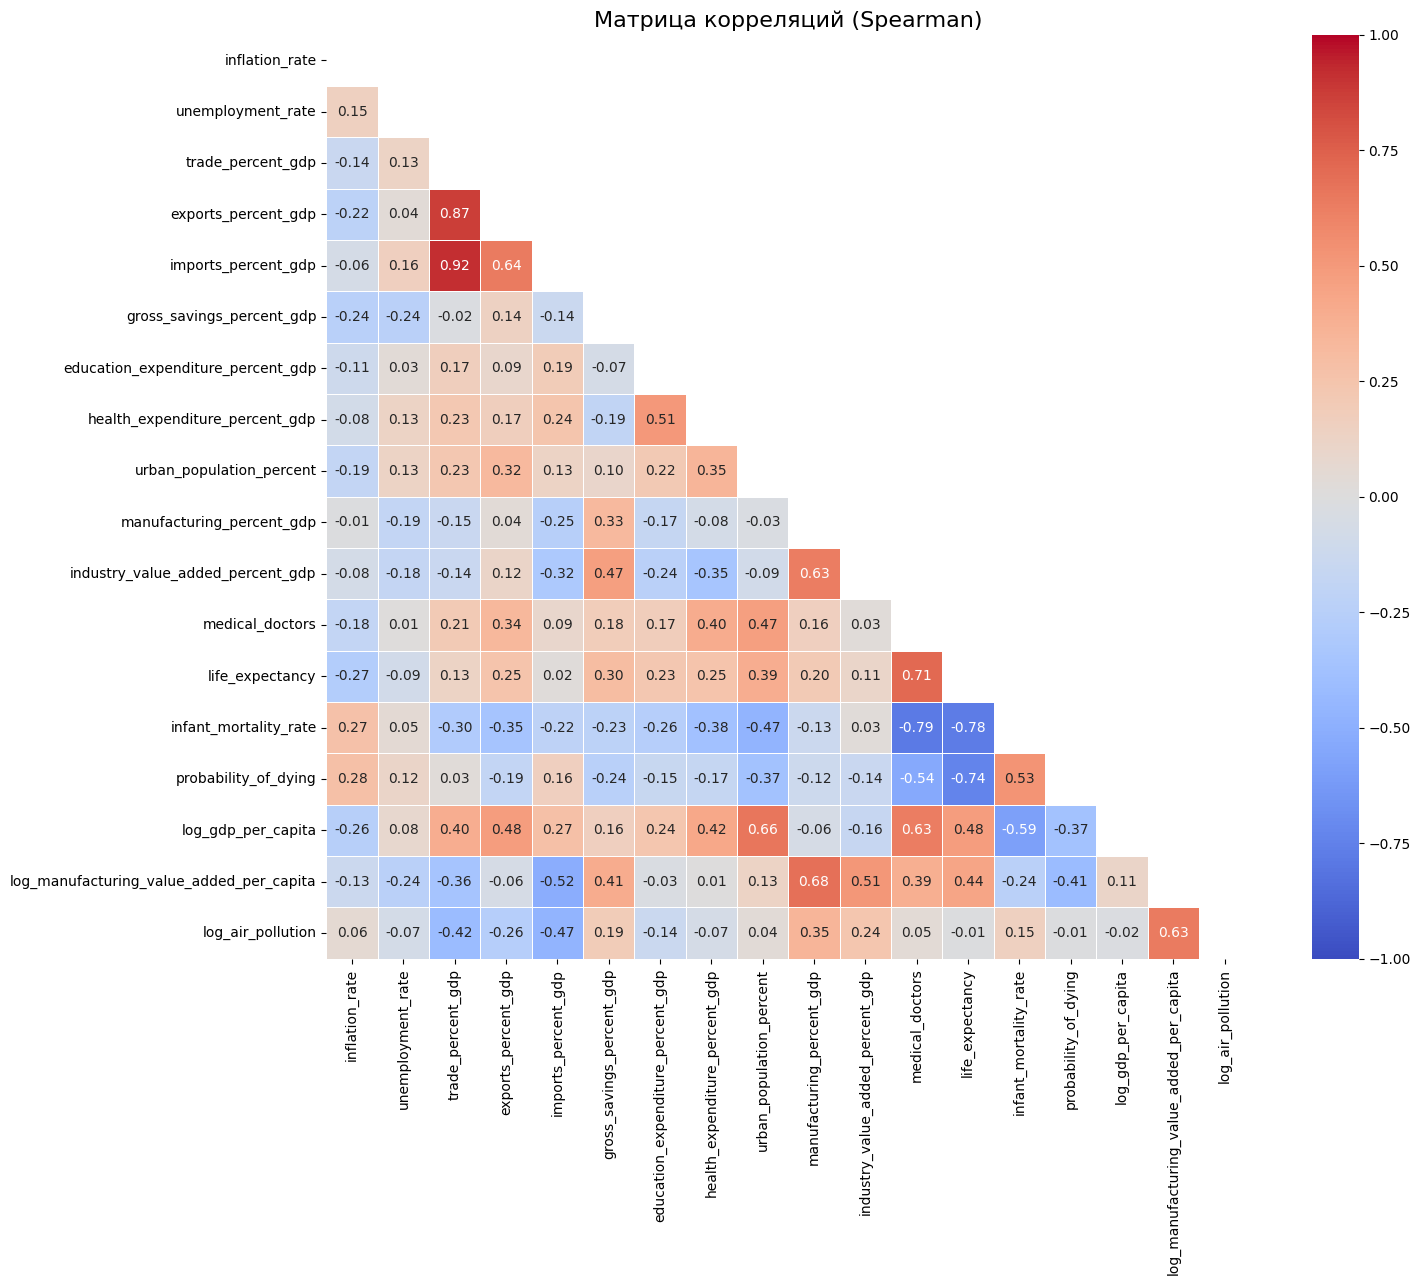

In [56]:
plt.figure(figsize=(16, 12))
corr_matrix = df_eda.corr(method='spearman')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmax=1, 
            vmin=-1, 
            center=0,
            square=True, 
            linewidths=.5)

plt.title('Матрица корреляций (Spearman)', fontsize=16)
plt.show()


In [57]:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            high_corr_pairs.append(
                (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            )

print("Высокая корреляция пар (>0.85)")
for pair in high_corr_pairs:
    print(f"{pair[0]} <--> {pair[1]}: {pair[2]:.2f}")

Высокая корреляция пар (>0.85)
exports_percent_gdp <--> trade_percent_gdp: 0.87
imports_percent_gdp <--> trade_percent_gdp: 0.92


In [58]:
if 'trade_percent_gdp' in df_eda.columns:
    df_eda = df_eda.drop(columns=['trade_percent_gdp'])


In [59]:
def print_top_bottom(df, col, n=5):
    is_log = col.startswith('log_')
    original_col_name = col.replace('log_', '')
    
    sorted_df = df.sort_values(col)
    bottom = sorted_df.head(n).index.tolist()
    top = sorted_df.tail(n).index.tolist()[::-1] # разворачиваем, чтобы 1-е место было первым
    
    val_bottom = sorted_df[col].head(n).values
    val_top = sorted_df[col].tail(n).values[::-1]
    
    if is_log:
        val_bottom = np.expm1(val_bottom)
        val_top = np.expm1(val_top)
        print(f"--- {original_col_name} (восстановленные значения) ---")
    else:
        print(f"--- {col} ---")
        
    print(f"Top {n}: {list(zip(top, np.round(val_top, 2)))}")
    print(f"Bottom {n}: {list(zip(bottom, np.round(val_bottom, 2)))}")
    print("")

print_top_bottom(df_eda, 'log_gdp_per_capita') # Богатство
print_top_bottom(df_eda, 'life_expectancy')    # Здоровье
print_top_bottom(df_eda, 'manufacturing_percent_gdp') # Индустриализация
print_top_bottom(df_eda, 'inflation_rate')     # Стабильность


--- gdp_per_capita (восстановленные значения) ---
Top 5: [('MCO', 220836.94), ('LIE', 190352.86), ('LUX', 128893.95), ('BMU', 122578.99), ('IRL', 101404.63)]
Bottom 5: [('BDI', 204.15), ('AFG', 409.58), ('CAF', 486.93), ('MDG', 498.29), ('MOZ', 564.17)]

--- life_expectancy ---
Top 5: [('KOR', 86.66), ('CHE', 85.11), ('AUS', 84.9), ('JPN', 84.46), ('PRT', 83.88)]
Bottom 5: [('CAF', 49.57), ('LSO', 51.48), ('SOM', 51.75), ('SWZ', 54.59), ('ZWE', 56.19)]

--- manufacturing_percent_gdp ---
Top 5: [('PRI', 45.59), ('LIE', 35.38), ('SMR', 32.63), ('IRL', 32.44), ('SWZ', 28.38)]
Bottom 5: [('BMU', 0.34), ('FSM', 0.5), ('TCA', 0.51), ('MAC', 0.84), ('CHI', 0.84)]

--- inflation_rate ---
Top 5: [('ZWE', 253.48), ('SDN', 220.39), ('LBN', 135.48), ('ARG', 103.25), ('TUR', 43.31)]
Bottom 5: [('BHR', 0.34), ('MAC', 0.59), ('IRQ', 0.73), ('PAN', 1.02), ('OMN', 1.07)]



<Figure size 1200x1200 with 0 Axes>

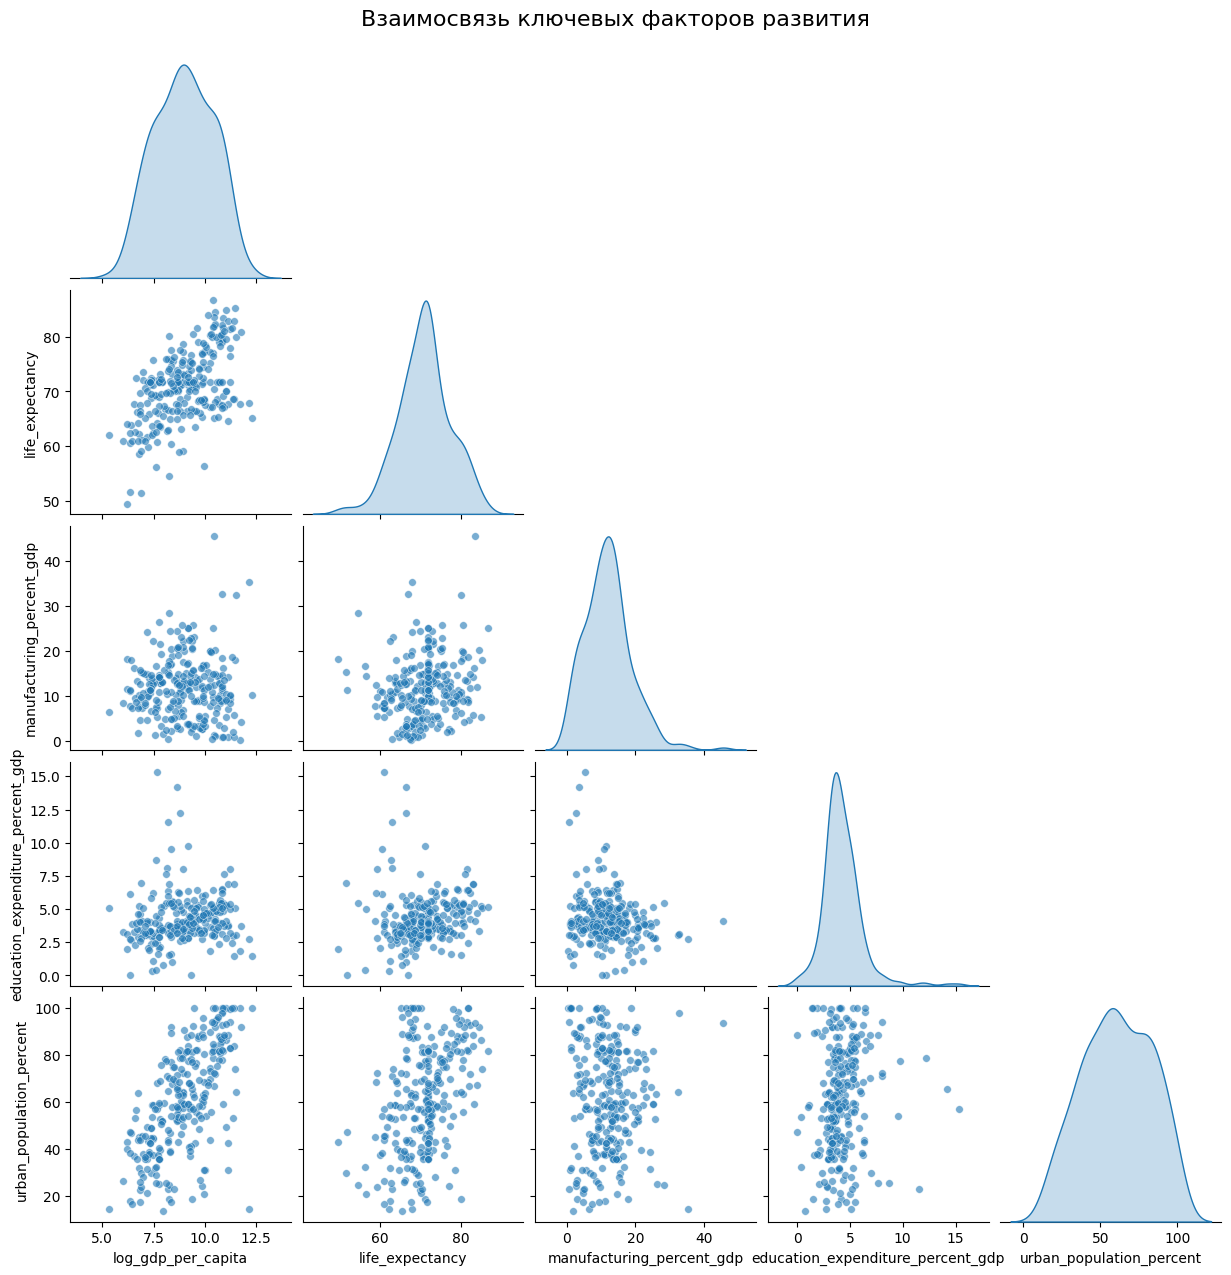

In [60]:
cols_for_pairplot = [
    'log_gdp_per_capita', 
    'life_expectancy', 
    'manufacturing_percent_gdp', 
    'education_expenditure_percent_gdp',
    'urban_population_percent'
]

cols_exist = [c for c in cols_for_pairplot if c in df_eda.columns]

plt.figure(figsize=(12, 12))
sns.pairplot(df_eda[cols_exist], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Взаимосвязь ключевых факторов развития', y=1.02, fontsize=16)
plt.show()


In [62]:
df_eda.to_csv("data/eda_dataset.csv")